<a href="https://colab.research.google.com/github/MGA215/Garncarz_MPA_MLF/blob/main/Lab02_Python/Exercise_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

## Exercise 1.1

write a code that prints the following pattern. Try to use as few loops as possible.

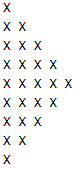

Avoid using trivial solutions like:

print('X')

print('X X')

print('X X X')

.....

print('X X X')

print('X X')

print('X')


In [ ]:
imax = 5;
direction_up = True;
i = 0;
while (direction_up or i != 0):
  print("X " * i);
  i += 1 if direction_up else -1; # Increment/decrement according to current direction
  if (i == imax): # Change of direction when maximum was hit
    direction_up = False;


X 
X X 
X X X 
X X X X 
X X X X X 
X X X X 
X X X 
X X 
X 


## Exercise 1.2

Write a script that will sum all numbers in the following string. You can split each number into single digits, so for example, you can consider 45 to be 4 and 5

In [ ]:
input_str = "n45as29@#8ss6"
sum = 0;
for ch in input_str:
  if ch.isdigit():
    sum += int(ch);

print(sum);

34


## Exercise 1.3

Write a script that will convert an arbitrary integer to a binary number (the number will be represented as a string with only *0* and *1*). Avoid using the *bin()* function or any other pythons default functions

In [ ]:
'''
def int2bin(number) -> str:
  out_str = "";
  number //= 1; # truncate
  if (number == 0):
    out_str = "0";
  elif (number > 0): # pos numbers
    while (number >= 1):
      if (number % 2 == 0):
        out_str += "0";
      else:
        out_str += "1";
      number //= 2;

  else: # neg numbers
    out_str += "0";


  return "".join(reversed(out_str));
'''

def int2bin(n, bits): # Generated with AI, wasn't in the mood for implementing two's complement
    # Range check
    min_val = -(1 << (bits - 1))
    max_val = (1 << (bits - 1)) - 1

    if n < min_val or n > max_val:
        raise ValueError(f"Number out of range for {bits}-bit representation")

    n = int(n)
    # If negative, convert using two's complement formula
    if n < 0:
        n = (1 << bits) + n

    binary_string = ""

    for i in range(bits):
        binary_string = str(n & 1) + binary_string
        n >>= 1

    return binary_string

print(int2bin(1.2, 10));

0000000001


## Exercise 1.4 - The Fibonacci Sequence:

The Fibonacci Sequence is a series of numbers. The following number is found by adding up the two numbers before it. The first two numbers are 0 and 1. For example, 0, 1, 1, 2, 3, 5, 8, 13. The following number in this series above is 8 + 13 = 21


Your task is to implement a function *fibonacci* that takes an integer as an input and returns a list that contains all Fibonacci numbers with values lower than the input integer

Example:

*print(fibonaci(10))*

[0, 1, 1, 2, 3, 5, 8]


In [ ]:
def fibonacci(upper_threshold: int) -> list:
  out_list = [0, 1];
  value = out_list[-1] + out_list[-2];
  while (value < upper_threshold):
    out_list.append(value);
    value = out_list[-1] + out_list[-2];
  return out_list;

print(fibonacci(10));

[0, 1, 1, 2, 3, 5, 8]


#### Advanced

Try to implement the function using multiple approaches: *Iterative approach*, *Recusrion*, *Memoization*

## Exercise 1.5. -  Rock, Paper, Scissors game:

#### basic

*Rock, Paper, Scissors* is a well-known and straightforward game. If you do not know the rules, google them. We will write a code for the Rock, Paper, Scissors game where the user plays against a random computer. The code can be written into one function *rock_paper_scissors*.

Notes:
- This implementation uses the **random** library to enable the computer to make a random choice.
- Keyword **Input** may be helpful. Check it
- After the function is run, the program will ask you about your movement, which you type in
- The game is case-insensitive for user input (e.g., "rock", "Rock", and "ROCK" are all valid).
- This script plays one round of the game.
- The script prints the result ('You lose', 'You win', 'It is a tie')


In [ ]:
import random
from enum import Enum

class Choice(Enum):
  ROCK = 0
  PAPER = 1
  SCISSORS = 2

def rock_paper_scissors() -> None:
  pc = random.choice(list(Choice));

  val = input();
  user = -1;
  val = val.upper();
  match (val):
    case "ROCK":
      user = Choice.ROCK;
    case "PAPER":
      user = Choice.PAPER;
    case "SCISSORS":
      user = Choice.SCISSORS;

  print("PC: " + pc.name);


  if (user == 0):
    print("Unknown input.");
  else:
    if (pc.value == user.value):
      print("Tie");
    elif (pc.value % 3 == ((user.value + 1) % 3)):
      print("U lose");
    else:
      print("U win");

rock_paper_scissors();


rock
PC: SCISSORS
U win


#### Advanced

Extend the Rock, Paper, Scissors game to be able to play *n* rounds.

Notes:
- The scrips will contain two counters - user score and computer score
- After each run, the script prints the current scores and rounds.
- When the number of rounds is reached, the script prints the result ('You lose', 'You win', 'It is a tie')

# Exercise 2

The purpose of this excercise is to practise working with NumPy library

## Exercise 2.1


In this exercise, you will work with NumPy arrays and learn how to efficiently modify and process them using both loops and vectorized operations. Your task is to:

1. Implement the function *create_array_nxn* that generates an n×n NumPy array filled with numbers from n² - 1 down to 0
2. Using a loop-based approach (for-loop, while-loop), implement the function *apply_threshold_loop* that takes any NumPy array and replaces all numbers below a user-defined threshold with 0.
3. Implement function *apply_threshold_vectorized* that performs the same operation as *apply_threshold_loop*, but without loops, using NumPy vectorized operations
4. Implement function *compare_performance* that compares the execution time of functions *apply_threshold_vectorized* and *apply_threshold_loop* with **time** library and print the results


**Additional Notes**:

- Ensure n is a positive integer (n > 0).
- Use the time library to measure execution times for performance comparison.
- The function *compare_performance(n, threshold)* should:
    - Generate an n×n array.
    - Apply both loop-based and vectorized thresholding.
    - Print execution times.

In [1]:
import numpy as np
import time

In [2]:
def create_array_nxn(n: int) -> np.ndarray:
  return np.arange(n*n, -1, -1);

In [4]:
def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
  result = arr.copy();
  for index, value in np.ndenumerate(result):
    if value < threshold:
      result[index] = 0;
  return result;

In [3]:
def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
  result = arr.copy();
  result[result < threshold] = 0;
  return result;

In [5]:
def compare_performance(n: int, threshold: int) -> None:
      # Generate random test data
    arr = create_array_nxn(n);

    # Measure loop-based version
    start_loop = time.perf_counter()
    apply_threshold_loop(arr, threshold)
    end_loop = time.perf_counter()

    # Measure vectorized version
    start_vec = time.perf_counter()
    apply_threshold_vectorized(arr, threshold)
    end_vec = time.perf_counter()

    loop_time = end_loop - start_loop
    vec_time = end_vec - start_vec

    print(f"Array size: {n}x{n}")
    print(f"Loop version time:        {loop_time:.6f} seconds")
    print(f"Vectorized version time:  {vec_time:.6f} seconds")
    pass

compare_performance(10000, 6000);

Array size: 10000x10000
Loop version time:        37.317301 seconds
Vectorized version time:  0.456947 seconds


## Exercise 2.2 - Digi display

#### basic

The task will be to create a simulation of a Digi display that will be able to display an arbitrary integer
   
*hint: to show the image, use the library matplotlib.pyplot. Also, you may find function *np.concatenate* helpful

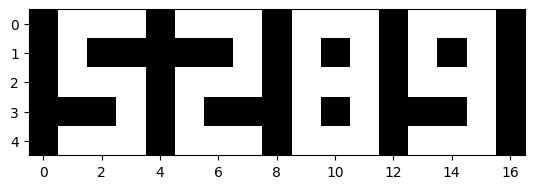

In [12]:
import matplotlib.pyplot as plt
import numpy as np

numbs = {
      "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 1
      "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]), # 2
      "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 3
      "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]), # 4
      "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 5
      "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 6
      "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 7
      "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 8
      "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 9
      "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]), # 0
  }

def show_in_digi(input_integer: int) -> None:
    # 1. Convert the integer to a string
    num_str = str(input_integer)

    # List to hold individual digit patterns
    digit_patterns = []
    digit_patterns.append([[0], [0], [0], [0], [0]])

    # 2. Retrieve digit patterns
    for digit_char in num_str:
        if digit_char in numbs:
            digit_patterns.append(numbs[digit_char])
            digit_patterns.append([[0], [0], [0], [0], [0]]) # add empty column

    # 3. Concatenate patterns horizontally
    if digit_patterns:
        full_display = np.concatenate(digit_patterns, axis=1)
    else:
        print("No digits to display.")
        return
    # 4. Display the combined pattern
    plt.imshow(full_display, cmap='binary_r')
    plt.show()

# Example usage:
show_in_digi(5289)

In [ ]:
import matplotlib.pyplot as plt

show_in_digi(5289) will show:


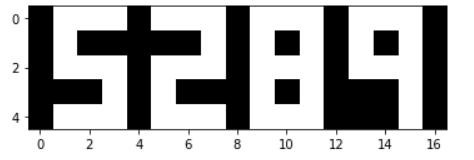

*hint2: you may find the following dict usefull*

#### advanced

Extend your *show_in_digi* function to be able to display an arbitary float number and negative numbers

# Exercise 3 - Playing with California Housing Dataset

The purpose of this exercise is to learn basic operations of **pandas** library. Use *california_housing_dataset* you can find in google colab to do following operations:

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('sample_data/california_housing_train.csv')

- check what *dataset.describe()* does

In [44]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- display all rows where *total_bedrooms* column is bigger than 310

In [45]:
df_total_bedrooms_filtered = dataset[dataset['total_bedrooms'] > 310]
display(df_total_bedrooms_filtered.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


- drop also first and last row

In [46]:
dataset.drop(dataset.index[0], inplace=True)
dataset.drop(dataset.index[-1], inplace=True)
display(dataset.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0


- save a mean of values in *households* columns to variable, using *matplotlib* display number of households in the graph (x-axis would be ID, y-axis - numbers of households) as dots with the same color, display also mean as a single line in the graph with different color as dots is

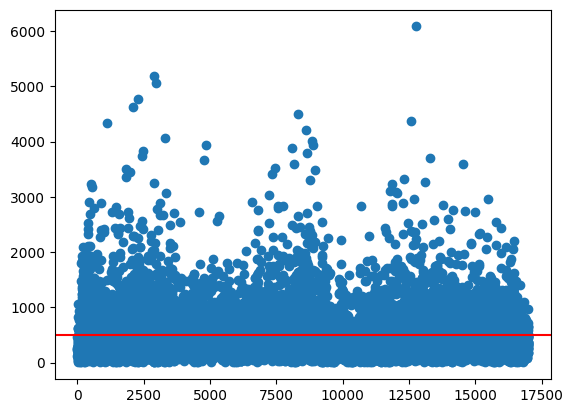

In [47]:
mean_households = dataset['households'].mean()
plt.plot(dataset['households'], 'o', label='Households')
plt.axhline(mean_households, color='r', linestyle='-', label='Mean')

 - check if any of the columns contain NaN values, if yes, replace the NaN values with the arithmetic mean of the whole dataset

In [48]:
dataset.fillna(dataset.mean(), inplace=True)

 - display *lat* and *long* into plot, *lat* would be on *x* axis and *long* on *y* axis

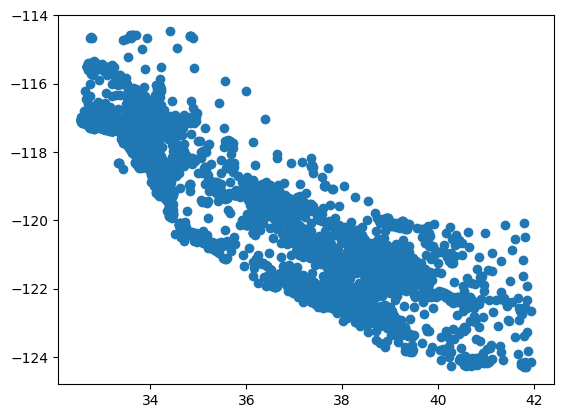

In [49]:
plt.scatter(dataset['latitude'], dataset['longitude'])

- choose two arbitrary columns and normalize all values inside using *min-max normalization*:

In [50]:
cols_to_normalize = ['housing_median_age', 'total_rooms']
for col in cols_to_normalize:
    dataset[col] = (dataset[col] - dataset[col].min()) / (dataset[col].max() - dataset[col].min())

display(dataset.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,0.352941,0.201608,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,0.313725,0.018927,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,0.254902,0.039515,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,0.372549,0.038276,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,0.549020,0.036510,236.0,671.0,239.0,3.3438,74000.0


- Create a Correlation Matrix from all columns

In [51]:
xcorr_mx = dataset.corr()
display(xcorr_mx)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925280,-0.113880,0.046768,0.071484,0.101692,0.059578,-0.015362,-0.044951
latitude,-0.925280,1.000000,0.016165,-0.038676,-0.069245,-0.111222,-0.074837,-0.080309,-0.144868
housing_median_age,-0.113880,0.016165,1.000000,-0.360927,-0.320336,-0.295897,-0.302738,-0.115983,0.106809
total_rooms,0.046768,-0.038676,-0.360927,1.000000,0.928397,0.860248,0.919075,0.195495,0.131084
total_bedrooms,0.071484,-0.069245,-0.320336,0.928397,1.000000,0.881288,0.981018,-0.013382,0.045884
population,0.101692,-0.111222,-0.295897,0.860248,0.881288,1.000000,0.909247,-0.000679,-0.027909
households,0.059578,-0.074837,-0.302738,0.919075,0.981018,0.909247,1.000000,0.007622,0.060996
median_income,-0.015362,-0.080309,-0.115983,0.195495,-0.013382,-0.000679,0.007622,1.000000,0.691841
median_house_value,-0.044951,-0.144868,0.106809,0.131084,0.045884,-0.027909,0.060996,0.691841,1.000000
